In [1]:
from train import train
import torch
import matplotlib.pyplot as plt
from utils import save_train_loss, init_bitnet

In [2]:
# default hyperparameters
batch_size = 16 # how many independent sequences will we process in parallel?
block_size = 32 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 100
gpt_lr = 1e-3
bitnet_lr = 9e-4
eval_iters = 200
n_embd = 64
n_head = 4
n_layer = 4
dropout = 0.0
seed = 1337
device = "cuda" if torch.cuda.is_available() else "cpu"
# ------------

In [3]:
# Prepare Inference
context = torch.zeros((1, 1), dtype=torch.long, device=device)
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
# create a mapping from integers to characters
itos = { i:ch for i,ch in enumerate(chars) }
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

In [4]:
# Train babyGPT
gpt_model, steps, train_losses, val_losses = train("gpt", learning_rate=gpt_lr, seed=1337)

0.209153 M parameters
step 0: train loss 4.1914, val loss 4.1918
step 100: train loss 2.6383, val loss 2.6327
step 200: train loss 2.4610, val loss 2.4578
step 300: train loss 2.4052, val loss 2.4249
step 400: train loss 2.3452, val loss 2.3468
step 500: train loss 2.2834, val loss 2.3005
step 600: train loss 2.2273, val loss 2.2554
step 700: train loss 2.1680, val loss 2.1876
step 800: train loss 2.1252, val loss 2.1621
step 900: train loss 2.0809, val loss 2.1222
step 1000: train loss 2.0701, val loss 2.1144
step 1100: train loss 2.0270, val loss 2.0914
step 1200: train loss 2.0043, val loss 2.0879
step 1300: train loss 1.9884, val loss 2.0581
step 1400: train loss 1.9720, val loss 2.0635
step 1500: train loss 1.9136, val loss 1.9998
step 1600: train loss 1.8989, val loss 2.0023
step 1700: train loss 1.9021, val loss 1.9994
step 1800: train loss 1.8957, val loss 1.9986
step 1900: train loss 1.8599, val loss 1.9703
step 2000: train loss 1.8489, val loss 1.9613
step 2100: train loss 1.

In [5]:
# Generate a text
gpt_model.eval()
generated_tokens = gpt_model.generate(context, max_new_tokens=500)[0].tolist()
print("\n--- Generated Text ---")
print(decode(generated_tokens))
print("--------------------")


--- Generated Text ---

MARCIS:
So, whow and is not the dide, bube doe.
Stir-dam meatina
he art that us hath buracedinghoates with my faft,
Or my lord, out proof it heart my follling
earisheds, hair latise in overs, and Wantory on than thelpin dise of thus, counvey:
Supernish have, myself.
I cannot sights, but you, thou killo Withon have iityeless mys,
Wife we high honour mower; then pray nonrupt for tream. Why:
'Twith all of which Prince, So my fright
Has, you saw adave the Earth, how by to mark.

CRICHARDI&cc VERCENT
--------------------


In [6]:
# Train babyBitnet
bitnet_model, steps, bitnet_train_losses, bitnet_val_losses = train("bitnet", learning_rate=bitnet_lr, seed=1337)

0.207617 M parameters
step 0: train loss 4.1812, val loss 4.1816
step 100: train loss 2.6638, val loss 2.6558
step 200: train loss 2.4993, val loss 2.5208
step 300: train loss 2.4175, val loss 2.4297
step 400: train loss 2.3777, val loss 2.3784
step 500: train loss 2.3417, val loss 2.3516
step 600: train loss 2.2936, val loss 2.3006
step 700: train loss 2.2715, val loss 2.2955
step 800: train loss 2.2537, val loss 2.2560
step 900: train loss 2.2078, val loss 2.2306
step 1000: train loss 2.1635, val loss 2.1946
step 1100: train loss 2.1475, val loss 2.1769
step 1200: train loss 2.1120, val loss 2.1532
step 1300: train loss 2.1041, val loss 2.1406
step 1400: train loss 2.0740, val loss 2.1217
step 1500: train loss 2.0572, val loss 2.0977
step 1600: train loss 2.0351, val loss 2.0959
step 1700: train loss 2.0145, val loss 2.0869
step 1800: train loss 2.0098, val loss 2.0643
step 1900: train loss 1.9802, val loss 2.0594
step 2000: train loss 1.9524, val loss 2.0301
step 2100: train loss 1.

In [7]:
# Generate a text
bitnet_model.eval()
init_bitnet(bitnet_model)
generated_tokens = bitnet_model.generate(context, max_new_tokens=500)[0].tolist()
print("\n--- Generated Text ---")
print(decode(generated_tokens))
print("--------------------")


--- Generated Text ---


YORGARER:
Noce.

Sharrow, bet
Yourke bube to tand On' my chailans!
You that usqueth. that diles ane away, my feans,
You her heavens, tof it heart mile,
You, at miree sendcing at Herchiove that.

WARGEY:
Will abousel.

Shame litther, cour by stave ais all,
ye where's normopeter'd gont:
Is would that
mone---
Fourtheriby, where dost washer, it he pooce
As forgued king thrupt for treary tomef think.

MUCIES:
Mader where of thath, be!

HONR&YOLIA:
Falce.

ERWICH:
Hih courrear tey, reath?

QUEEENEN:

--------------------


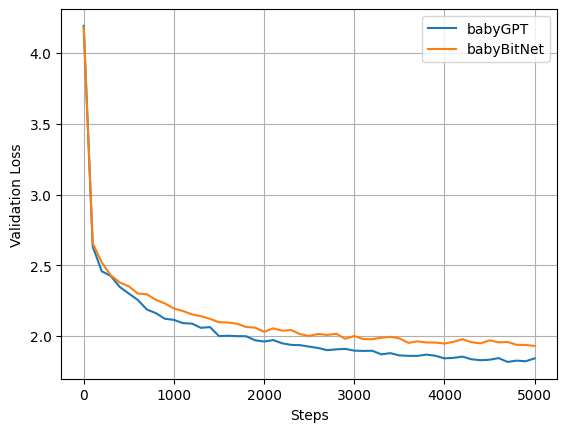

In [8]:
# Plot Validation Loss
plt.plot(steps, val_losses, label="babyGPT")
plt.plot(steps, bitnet_val_losses, label="babyBitNet")
plt.xlabel("Steps")
plt.ylabel("Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# # Save results in results.csv
# save_train_loss("gpt", val_losses)
# save_train_loss("bitnet", bitnet_val_losses)